<a href="https://colab.research.google.com/github/Saulrega/EDA/blob/main/Tweets_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop=set(stopwords.words('english'))

import re


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/MyDrive/Portafolio/Scientis/NLP'
!ls

/content/drive/MyDrive/Portafolio/Scientis/NLP
 data  'Proyecto NLP.ipynb'


In [ ]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [ ]:
print('Shape of train_df ', train.shape)
print('Shape of test_df ', test.shape)

Shape of train_df  (7613, 5)
Shape of test_df  (3263, 4)


In [ ]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

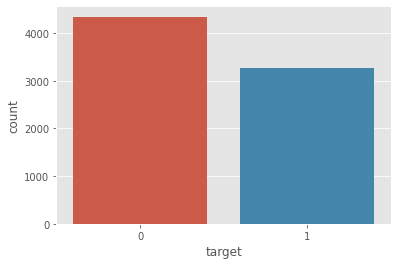

In [ ]:
sns.countplot(data=train, x='target')
plt.show()

In [ ]:
target_0 = train[train["target"] == 0]["text"]
print(target_0.values[23])

Had an awesome time visiting the CFC head office the ancop site and ablaze. Thanks to Tita Vida for taking care of us ??


In [ ]:
target_1 = train[train["target"] == 1]["text"]
print(target_1.values[99])

Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/TH9YwBbeet #worldNews


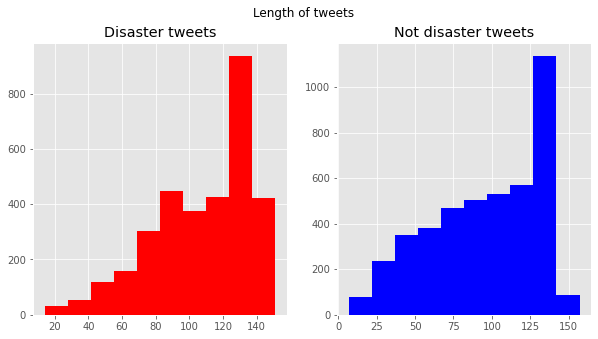

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len= target_1.str.len()
ax1.hist(tweet_len, color='red')
ax1.set_title('Disaster tweets')

tweet_len=target_0.str.len()
ax2.hist(tweet_len,color='blue')
ax2.set_title('Not disaster tweets')

fig.suptitle('Length of tweets')
plt.show()

In [ ]:
location = train['location'].value_counts().reset_index()
top10_location = location.iloc[:10]
top10_location

,index,location
0,USA,104
1,New York,71
2,United States,50
3,London,45
4,Canada,29
5,Nigeria,28
6,UK,27
7,"Los Angeles, CA",26
8,India,24
9,Mumbai,22


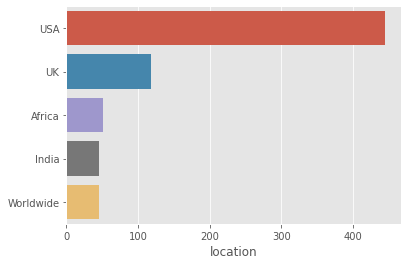

In [ ]:
train['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                           "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)

sns.barplot(y=train['location'].value_counts()[:5].index,
            x=train['location'].value_counts()[:5],
            orient='h')

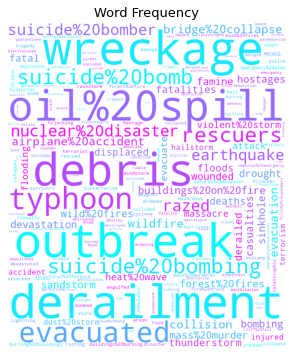

In [ ]:
from wordcloud import WordCloud
word_freq_dic = train[train.target==1].keyword.value_counts().to_dict()

wordcloud = WordCloud(background_color ='white', colormap='cool',
                      width = 600, height = 700, random_state = 42).generate_from_frequencies(word_freq_dic)

plt.figure(figsize = (6, 6)) 
plt.imshow(wordcloud)
plt.title("Word Frequency", size = 13)

plt.axis('off') 

plt.show()

Text(0.5, 0.98, 'Average word length in each tweet')

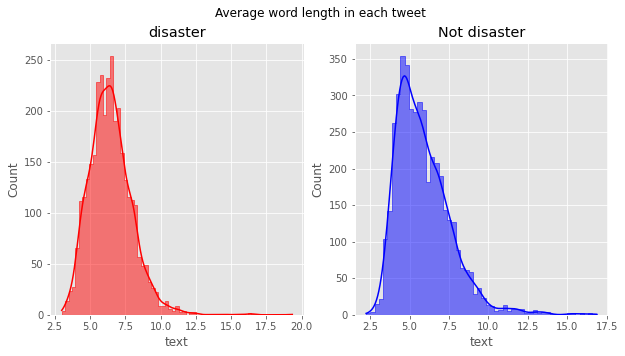

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train[train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),kde=True,ax=ax1,color='red', element="step")
ax1.set_title('disaster')
word=train[train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),kde=True,ax=ax2,color='blue',element="step")
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

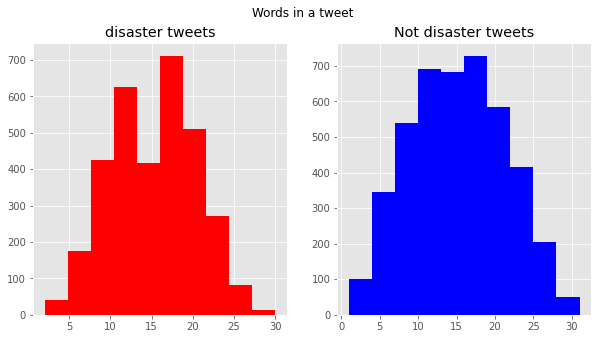

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='blue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

In [ ]:
def create_corpus(target):
    corpus=[]
    
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
from collections import defaultdict
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top_ten_0=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

<BarContainer object of 10 artists>

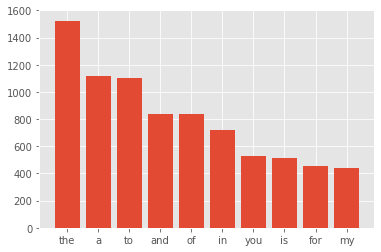

In [ ]:
x,y=zip(*top_ten_0)
plt.bar(x,y)

<BarContainer object of 10 artists>

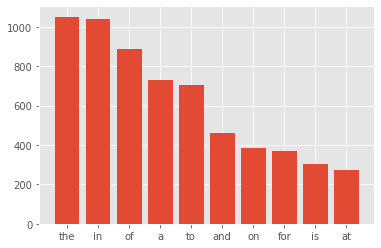

In [ ]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top_ten_1=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    


x,y=zip(*top_ten_1)
plt.bar(x,y)

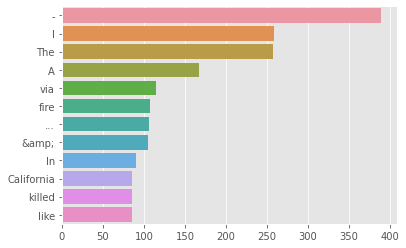

In [ ]:
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x);

## Cleaning

In [ ]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [ ]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b

In [ ]:
import string
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [ ]:
def normalize_text(text):
  text = text.lower()
  text = re.sub('\n', '', text)
  return text

In [ ]:
train['text'] = train['text'].apply(lambda x: remove_URL(x))
train['text'] = train['text'].apply(lambda x: remove_html(x))
train['text'] = train['text'].apply(lambda x: remove_emoji(x))
train['text'] = train['text'].apply(lambda x: remove_punct(x))
train['text'] = train['text'].apply(lambda x: normalize_text(x))

In [ ]:
test['text'] = test['text'].apply(lambda x: remove_URL(x))
test['text'] = test['text'].apply(lambda x: remove_html(x))
test['text'] = test['text'].apply(lambda x: remove_emoji(x))
test['text'] = test['text'].apply(lambda x: remove_punct(x))
test['text'] = train['text'].apply(lambda x: normalize_text(x))

In [ ]:
train['text'][0:20]

0     our deeds are the reason of this earthquake ma...
1                 forest fire near la ronge sask canada
2     all residents asked to shelter in place are be...
3     13000 people receive wildfires evacuation orde...
4     just got sent this photo from ruby alaska as s...
5     rockyfire update  california hwy 20 closed in ...
6     flood disaster heavy rain causes flash floodin...
7     im on top of the hill and i can see a fire in ...
8     theres an emergency evacuation happening now i...
9      im afraid that the tornado is coming to our area
10          three people died from the heat wave so far
11    haha south tampa is getting flooded hah wait a...
12    raining flooding florida tampabay tampa 18 or ...
13                flood in bago myanmar we arrived bago
14    damage to school bus on 80 in multi car crash ...
15                                         whats up man
16                                        i love fruits
17                                     summer is

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train['text'] = train['text'].apply(lambda x: tokenizer.tokenize(x))
test['text'] = test['text'].apply(lambda x: tokenizer.tokenize(x))

train['text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [13000, people, receive, wildfires, evacuation...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

In [ ]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

train['text'] = train['text'].apply(lambda x: remove_stopwords(x))
test['text'] = test['text'].apply(lambda x: remove_stopwords(x))
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[13000, people, receive, wildfires, evacuation...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


In [ ]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

train['text'] = train['text'].apply(lambda x: combine_text(x))
test['text'] = test['text'].apply(lambda x: combine_text(x))
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [ ]:
def text_preprocessing(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = remove_URL(text)
    nopunc = remove_html(text)
    nopunc = remove_emoji(text)
    nopunc = remove_punct(text)
    nopunc = normalize_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(train['text'])
test_vectors = count_vectorizer.transform(test['text'])

print(train_vectors[0].todense())

[[0 0 0 ... 0 0 0]]


In [ ]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tfidf = tfidf.fit_transform(train['text'])
test_tfidf = tfidf.transform(test["text"])

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1.0)
scores = model_selection.cross_val_score(clf, train_vectors, train["target"], cv=5, scoring="f1")
scores

array([0.59710145, 0.49956635, 0.56392887, 0.54079696, 0.67481663])

In [ ]:
clf.fit(train_vectors, train["target"])

LogisticRegression()

In [ ]:
clf_tfidf = LogisticRegression(C=1.0)
scores = model_selection.cross_val_score(clf_tfidf, train_tfidf, train["target"], cv=5, scoring="f1")
scores

array([0.58307849, 0.47924528, 0.53541858, 0.4912999 , 0.64464286])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB()
scores = model_selection.cross_val_score(clf_NB, train_vectors, train["target"], cv=5, scoring="f1")
scores

array([0.63265306, 0.60641399, 0.68740955, 0.63823065, 0.72590567])

In [ ]:
clf_NB.fit(train_vectors, train["target"])

MultinomialNB()

In [ ]:
clf_NB_TFIDF = MultinomialNB()
scores = model_selection.cross_val_score(clf_NB_TFIDF, train_tfidf, train["target"], cv=5, scoring="f1")
scores

array([0.56973294, 0.57418788, 0.60387324, 0.59010271, 0.72399672])

In [ ]:
clf_NB_TFIDF.fit(train_tfidf, train["target"])

MultinomialNB()

In [ ]:
def submission(submission_file_path,model,test_vectors):
    sample_submission = pd.read_csv(submission_file_path)
    sample_submission["target"] = model.predict(test_vectors)
    sample_submission.to_csv("submission.csv", index=False)

In [ ]:
submission_file_path = "/content/drive/MyDrive/Portafolio/Scientis/NLP/data/sample_submission.csv"
test_vectors = test_tfidf
submission(submission_file_path,clf_NB_TFIDF,test_vectors)